In [1]:
# by Melike Enginsoy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [124]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [5]:
import warnings
warnings.simplefilter(action="ignore")

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [7]:
def load():
    data = pd.read_csv("C:/Users/hme/Desktop/DATA SCIENCE/GLOBAL AI HUB/SUMMER CAMP22/PROJE 1/insurance.csv")
    return data

In [56]:
df = load()

In [9]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.25, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print(dataframe.describe().T)

In [57]:
check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex    bmi  children smoker     region   charges
0   19  female 27.900         0    yes  southwest 16884.924
1   18    male 33.770         1     no  southeast  1725.552
2   28    male 33.000         3     no  southeast  4449.462
3   33    male 22.705         0     no  northwest 21984.471
4   32    male 28.880         0     no  northwest  3866.855
##################### Tail #####################
      age     sex    bmi  children smoker     region   charges
1333   50    male 30.970         3     no  northwest 10600.548
1334   18  female 31.920         0     no  northeast  2205.981
1335   18  female 36.850         0     no  southeast  1629.833
1336   21  female 25.800  

In [11]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

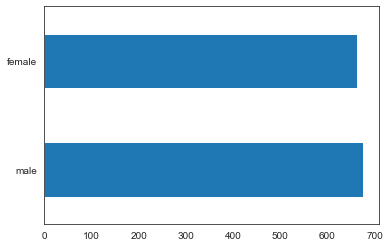

In [32]:
df["sex"].value_counts().plot.barh();

In [33]:
df["bmi"].describe().T

count   1338.000
mean      30.663
std        6.098
min       15.960
25%       26.296
50%       30.400
75%       34.694
max       53.130
Name: bmi, dtype: float64

Text(0.5, 1.0, 'BMI Distribution')

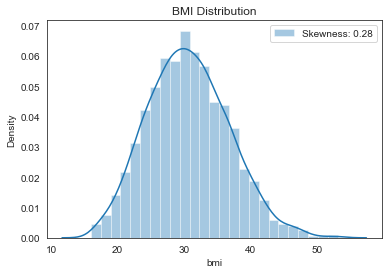

In [21]:
sns.set_style('white')
sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')

In [12]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

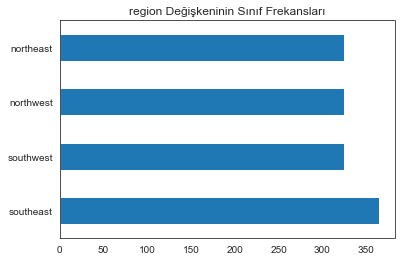

In [34]:
(df["region"]
 .value_counts()
 .plot.barh()
 .set_title("region Değişkeninin Sınıf Frekansları"));

In [13]:
df.groupby(["smoker"]).agg({"charges": ["count", "sum", "mean"]})

charges                      
         count         sum      mean
smoker                              
no        1064 8974061.469  8434.268
yes        274 8781763.522 32050.232

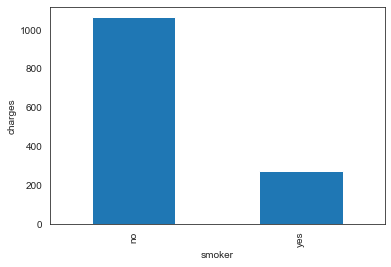

In [19]:
df["charges"], df["smoker"].value_counts().plot(kind = "bar")
plt.xlabel('smoker')
plt.ylabel('charges')

plt.show()

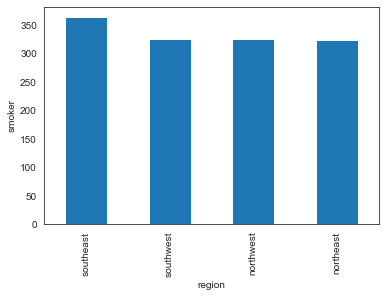

In [20]:
df["smoker"], df["region"].value_counts().plot(kind = "bar")
plt.xlabel('region')
plt.ylabel('smoker')

plt.show()

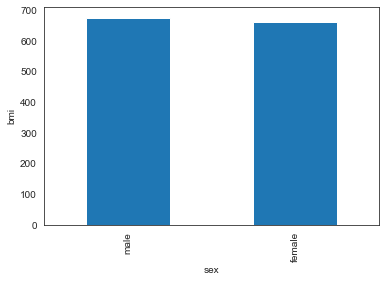

In [22]:
df["bmi"], df["sex"].value_counts().plot(kind = "bar")
plt.xlabel('sex')
plt.ylabel('bmi')

plt.show()

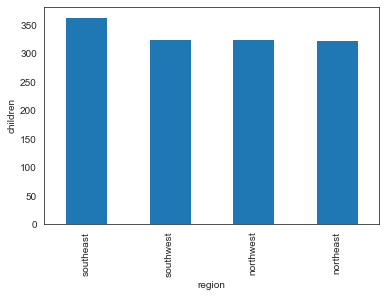

In [23]:
df["children"], df["region"].value_counts().plot(kind = "bar")
plt.xlabel('region')
plt.ylabel('children')

plt.show()

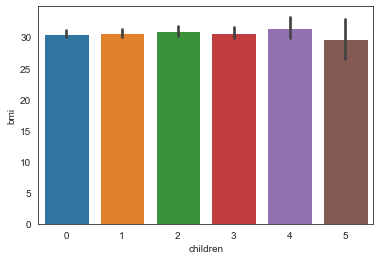

In [29]:
sns.barplot(x="children",y="bmi",data=df);

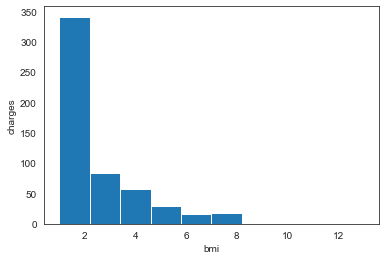

In [31]:
df["charges"], df["bmi"].value_counts().plot(kind = "hist")
plt.xlabel('bmi')
plt.ylabel('charges')

plt.show()

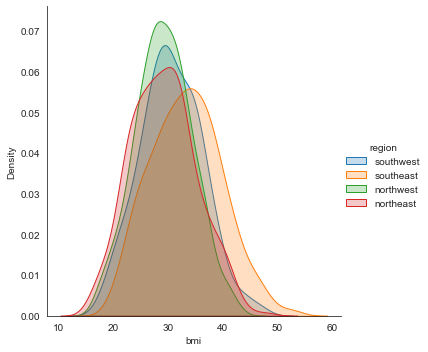

In [42]:
(sns
 .FacetGrid(df,
              hue = "region",
              height = 5,)
 .map(sns.kdeplot, "bmi", shade= True)
 .add_legend()
);

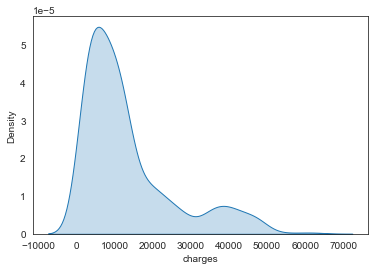

In [35]:
sns.kdeplot(df.charges, shade = True);

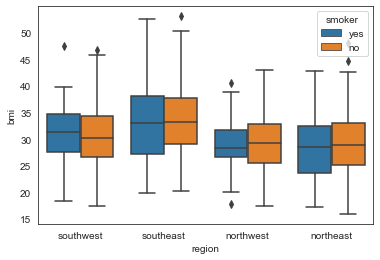

In [37]:
sns.boxplot(x = "region", y = "bmi", hue = "smoker", data = df);

In [58]:
encoder = LabelEncoder()

df["smoker"] = encoder.fit_transform(df["smoker"])
df["sex"] = encoder.fit_transform(df["sex"])

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.924
1,18,1,33.770,1,0,southeast,1725.552
2,28,1,33.000,3,0,southeast,4449.462
3,33,1,22.705,0,0,northwest,21984.471
4,32,1,28.880,0,0,northwest,3866.855


In [60]:
df_region = pd.get_dummies(df["region"], drop_first=True)

In [61]:
df_region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [63]:
df = pd.concat([df,df_region],axis=1)

In [65]:
df = df.drop('region',axis=1)

In [66]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.924,0,0,1
1,18,1,33.770,1,0,1725.552,0,1,0
2,28,1,33.000,3,0,4449.462,0,1,0
3,33,1,22.705,0,0,21984.471,1,0,0
4,32,1,28.880,0,0,3866.855,1,0,0


In [70]:
scaler = StandardScaler()

In [71]:
y = df['charges']
X = df.drop('charges',axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# LinearRegression

In [76]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [77]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

5796.284659276272

In [81]:
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

37885866.0618388

In [ ]:
#RidgeRegression

In [86]:
ridge_model = RidgeCV().fit(X_train, y_train)

In [88]:
y_pred = ridge_model.predict(X_test)

In [89]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

5796.679210096734

In [90]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

6155.103777352148

In [ ]:
#LassoRegression

In [93]:
lasso_model = LassoCV().fit(X_train, y_train)

In [94]:
y_pred = lasso_model.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

5848.970652126231

In [ ]:
#ElasticNet

In [97]:
enet_model = ElasticNetCV().fit(X_train, y_train)

In [98]:
y_pred = enet_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

11584.423657197809

In [ ]:
#SVR

In [103]:
svr_model = SVR().fit(X_train, y_train)

In [104]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

12903.187974708075

In [ ]:
#CART

In [108]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [109]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [110]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4784.599335776226

In [ ]:
#RF

In [115]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [116]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4577.738987730898

In [ ]:
#GBM

In [122]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [123]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4334.474482058542

In [ ]:
#XGBOOST

In [125]:
xgb = XGBRegressor().fit(X_train, y_train)

In [126]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5165.237321127724

In [ ]:
#LightGBM

In [127]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [128]:
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4534.0250398531325

In [ ]:
#CatBoost

In [129]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.041383
0:	learn: 11623.6442136	total: 66.8ms	remaining: 1m 6s
1:	learn: 11267.0441252	total: 67.8ms	remaining: 33.8s
2:	learn: 10948.8365124	total: 69.2ms	remaining: 23s
3:	learn: 10607.9007406	total: 70.4ms	remaining: 17.5s
4:	learn: 10291.5452513	total: 71.7ms	remaining: 14.3s
5:	learn: 9997.7765492	total: 72.9ms	remaining: 12.1s
6:	learn: 9715.2252468	total: 74.1ms	remaining: 10.5s
7:	learn: 9449.2558641	total: 74.7ms	remaining: 9.27s
8:	learn: 9191.8764733	total: 76.1ms	remaining: 8.37s
9:	learn: 8935.5325586	total: 77.4ms	remaining: 7.66s
10:	learn: 8703.1623852	total: 78.6ms	remaining: 7.07s
11:	learn: 8464.8884615	total: 79.3ms	remaining: 6.53s
12:	learn: 8245.6063737	total: 80.1ms	remaining: 6.08s
13:	learn: 8043.8051452	total: 81.4ms	remaining: 5.73s
14:	learn: 7856.3511850	total: 82.7ms	remaining: 5.43s
15:	learn: 7690.1178401	total: 84ms	remaining: 5.17s
16:	learn: 7518.9765151	total: 85.4ms	remaining: 4.94s
17:	learn: 7348.0185003	total: 86.7ms	remain

215:	learn: 3906.8862671	total: 316ms	remaining: 1.15s
216:	learn: 3905.2312302	total: 317ms	remaining: 1.14s
217:	learn: 3904.2079763	total: 318ms	remaining: 1.14s
218:	learn: 3903.9023265	total: 319ms	remaining: 1.14s
219:	learn: 3902.1671657	total: 320ms	remaining: 1.13s
220:	learn: 3898.4545243	total: 321ms	remaining: 1.13s
221:	learn: 3894.6217649	total: 323ms	remaining: 1.13s
222:	learn: 3893.2798578	total: 324ms	remaining: 1.13s
223:	learn: 3890.5941423	total: 325ms	remaining: 1.13s
224:	learn: 3886.0836885	total: 326ms	remaining: 1.12s
225:	learn: 3882.2473241	total: 327ms	remaining: 1.12s
226:	learn: 3881.5270450	total: 329ms	remaining: 1.12s
227:	learn: 3879.3143809	total: 330ms	remaining: 1.12s
228:	learn: 3878.2862779	total: 332ms	remaining: 1.12s
229:	learn: 3875.1481836	total: 333ms	remaining: 1.11s
230:	learn: 3873.2517363	total: 334ms	remaining: 1.11s
231:	learn: 3872.6244882	total: 336ms	remaining: 1.11s
232:	learn: 3870.9775675	total: 337ms	remaining: 1.11s
233:	learn

458:	learn: 3445.4965766	total: 649ms	remaining: 765ms
459:	learn: 3443.8959202	total: 651ms	remaining: 764ms
460:	learn: 3442.9339650	total: 652ms	remaining: 762ms
461:	learn: 3439.2021697	total: 654ms	remaining: 761ms
462:	learn: 3438.5089777	total: 655ms	remaining: 760ms
463:	learn: 3435.9569390	total: 656ms	remaining: 758ms
464:	learn: 3433.0142432	total: 657ms	remaining: 756ms
465:	learn: 3429.8277136	total: 659ms	remaining: 755ms
466:	learn: 3428.3390315	total: 660ms	remaining: 754ms
467:	learn: 3426.9328360	total: 662ms	remaining: 753ms
468:	learn: 3425.4284045	total: 663ms	remaining: 751ms
469:	learn: 3424.9279338	total: 665ms	remaining: 749ms
470:	learn: 3423.0948345	total: 666ms	remaining: 748ms
471:	learn: 3421.0186597	total: 673ms	remaining: 752ms
472:	learn: 3417.3583825	total: 677ms	remaining: 754ms
473:	learn: 3417.1181438	total: 678ms	remaining: 752ms
474:	learn: 3415.3095025	total: 679ms	remaining: 751ms
475:	learn: 3414.9641097	total: 681ms	remaining: 749ms
476:	learn

629:	learn: 3189.3270456	total: 969ms	remaining: 569ms
630:	learn: 3186.7631230	total: 970ms	remaining: 567ms
631:	learn: 3185.7013771	total: 971ms	remaining: 566ms
632:	learn: 3183.8907454	total: 973ms	remaining: 564ms
633:	learn: 3181.2452835	total: 974ms	remaining: 562ms
634:	learn: 3179.6897941	total: 976ms	remaining: 561ms
635:	learn: 3178.5057237	total: 977ms	remaining: 559ms
636:	learn: 3176.0343627	total: 979ms	remaining: 558ms
637:	learn: 3175.9272865	total: 980ms	remaining: 556ms
638:	learn: 3174.9763717	total: 982ms	remaining: 555ms
639:	learn: 3173.1383310	total: 984ms	remaining: 553ms
640:	learn: 3170.9252354	total: 986ms	remaining: 552ms
641:	learn: 3168.3897625	total: 989ms	remaining: 551ms
642:	learn: 3167.4061643	total: 994ms	remaining: 552ms
643:	learn: 3165.3994672	total: 996ms	remaining: 550ms
644:	learn: 3164.0874132	total: 997ms	remaining: 549ms
645:	learn: 3163.2280159	total: 999ms	remaining: 547ms
646:	learn: 3162.5501177	total: 1s	remaining: 546ms
647:	learn: 3

872:	learn: 2873.4725015	total: 1.3s	remaining: 189ms
873:	learn: 2873.0417805	total: 1.3s	remaining: 187ms
874:	learn: 2872.1903480	total: 1.3s	remaining: 186ms
875:	learn: 2871.8900066	total: 1.3s	remaining: 184ms
876:	learn: 2870.9692697	total: 1.3s	remaining: 183ms
877:	learn: 2869.3715251	total: 1.3s	remaining: 181ms
878:	learn: 2868.3412921	total: 1.3s	remaining: 180ms
879:	learn: 2865.5911089	total: 1.31s	remaining: 178ms
880:	learn: 2864.8899160	total: 1.31s	remaining: 177ms
881:	learn: 2863.9279126	total: 1.31s	remaining: 175ms
882:	learn: 2861.8551173	total: 1.31s	remaining: 174ms
883:	learn: 2859.5166146	total: 1.31s	remaining: 172ms
884:	learn: 2858.8043963	total: 1.31s	remaining: 171ms
885:	learn: 2856.3396253	total: 1.31s	remaining: 169ms
886:	learn: 2854.6366319	total: 1.31s	remaining: 167ms
887:	learn: 2854.3450842	total: 1.32s	remaining: 166ms
888:	learn: 2853.8219168	total: 1.32s	remaining: 164ms
889:	learn: 2853.5387457	total: 1.32s	remaining: 163ms
890:	learn: 2849.

In [130]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4472.434215263854